In [8]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [9]:
stopwords = nltk.corpus.stopwords.words('english')
# ps = nltk.PorterStemmer()

### Read Data

In [10]:
pd.set_option('display.max_colwidth', 100)

df1 = pd.read_csv("../curated-data/StandardPart.csv")
df1.head(5)

,record_id,faculty_rank,gender,departmental_affiliation,please_write_down_the_depa,google_scholar_h_index,state_do_you_reside,how_many_months_of_your_sa,please_specify_the_months,what_is_your_current_level,...,spend_time_with_a_special,think_about_the_event_and,wish_that_i_could_change_w,go_out_fora_snack_or_meal,analyze_my_problem_before,focus_on_my_general_inadeq,phone_a_friend,email,confirm_email,standard_part_complete
0,81,Professor,Male,Computer Science,NaN,41.0,Texas,Three months,NaN,25-1%,...,2,4,4,1,3,3,1,ljohnsson12@gmail.com,ljohnsson12@gmail.com,2
1,95,Associate Professor,Male,Biology,NaN,25.0,Texas,1.5,1.5,100-75%,...,4,5,4,4,5,2,3,frankino@uh.edu,frankino@uh.edu,2
2,96,Assistant Professor,Female,Psychology,NaN,0.0,Texas,12,12,Fully funded,...,2,4,3,3,4,2,2,tammy@tolaranalytics.com,tammy@tolaranalytics.com,2
3,97,Assistant Professor,Male,Physics,NaN,17.0,Texas,Three months,NaN,100-75%,...,4,2,4,5,4,5,1,phosur@uh.edu,phosur@uh.edu,2
4,109,Professor,Male,Psychology,NaN,60.0,Texas,Three months,NaN,50-25%,...,1,5,1,1,5,1,3,spwoods@uh.edu,spwoods@uh.edu,2


In [11]:
df2 = pd.read_csv("../curated-data/CorrelationData.csv")
df2.head(5)
df2.SR

0      1
1      1
2      1
3      0
4      1
      ..
389    0
390    1
391    0
392    1
393    0
Name: SR, Length: 394, dtype: int64

## Funding Proposal

In [12]:
Data = pd.DataFrame({'SR': df2['SR'],
                     'comments' : df1['please_write_about_any_oth']})
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SR        394 non-null    int64 
 1   comments  172 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


In [13]:
Data = Data[Data['comments'].notna()]
Data.head()

,SR,comments
4,1,"Most often, proposal deadlines are easily managed with proper planning and ongoing task monitori..."
5,0,There is a lot of variability in the extent to which I work up to the deadline on proposals. Two...
8,0,"Advance thought processes, preparation will help. However, the stress of not having money in the..."
11,0,Interval deadlines could work. What interval would work best is a research question in its own r...
17,1,"Although I have not experience it yet, I am favorable of the no deadline approach introduced by ..."


In [14]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# le.fit(Data.SR)
# le.transform(Data.SR)

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [16]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopwords])
    return text

In [17]:
Data['cleaned_text'] = Data['comments'].apply(lambda x: clean_text(x))
Data.head()

,SR,comments,cleaned_text
4,1,"Most often, proposal deadlines are easily managed with proper planning and ongoing task monitori...",often proposal deadline easily managed proper planning ongoing task monitoring
5,0,There is a lot of variability in the extent to which I work up to the deadline on proposals. Two...,lot variability extent work deadline proposal two submitted 15 minute deadline submit least day ...
8,0,"Advance thought processes, preparation will help. However, the stress of not having money in the...",advance thought process preparation help however stress money bank fund lab overwhelming
11,0,Interval deadlines could work. What interval would work best is a research question in its own r...,interval deadline could work interval would work best research question right
17,1,"Although I have not experience it yet, I am favorable of the no deadline approach introduced by ...",although experience yet favorable deadline approach introduced nsf certain directoratesdivisions


In [18]:
# def remove_punc(text):
#     text_notpunc = "".join([char for char in text if char not in string.punctuation])
#     return text_notpunc

# Data['clean_data_punc'] = Data['comments'].apply(lambda x: remove_punc(x))

# Data.head()

In [19]:
# def tokenize(text):
#     token = re.split('\W+', text)
#     return token
# Data['clean_data_tokenize'] = Data['clean_data_punc'].apply(lambda x: tokenize(x.lower())) 
# Data.head()

In [20]:
# stopword = nltk.corpus.stopwords.words('english')

In [21]:
# def remove_stop_words(tokenized_list):
#     text = [word for word in tokenized_list if word not in stopword]
#     return text

# Data['clean_data_stopwords'] = Data['clean_data_tokenize'].apply(lambda x: remove_stop_words(x))

# Data.head()

In [22]:
# def stemming(tokenized_text):
#     text = [ps.stem(word) for word in tokenized_text]
#     return text

# Data['clean_data_stemmed'] = Data['clean_data_stopwords'].apply(lambda x: stemming(x))
# Data.head()

In [23]:
# def lemmatizeing(tokenized_text):
#     text = [wn.lemmatize(word) for word in tokenized_text]
#     return text

# Data['clean_data_lemmatized'] = Data['clean_data_stopwords'].apply(lambda x: lemmatizeing(x))
# Data.head(10)

In [24]:
# def plain_text(tokenized_text):
#     plain_text = ", ".join([char for char in tokenized_text])
#     text_notpunc = "".join([char for char in plain_text if char not in string.punctuation])
#     return text_notpunc
# #     return plain_text

# Data['clean_data'] = Data['clean_data_lemmatized'].apply(lambda x: plain_text(x))

# Data.head()

In [25]:
# pip install wordcloud

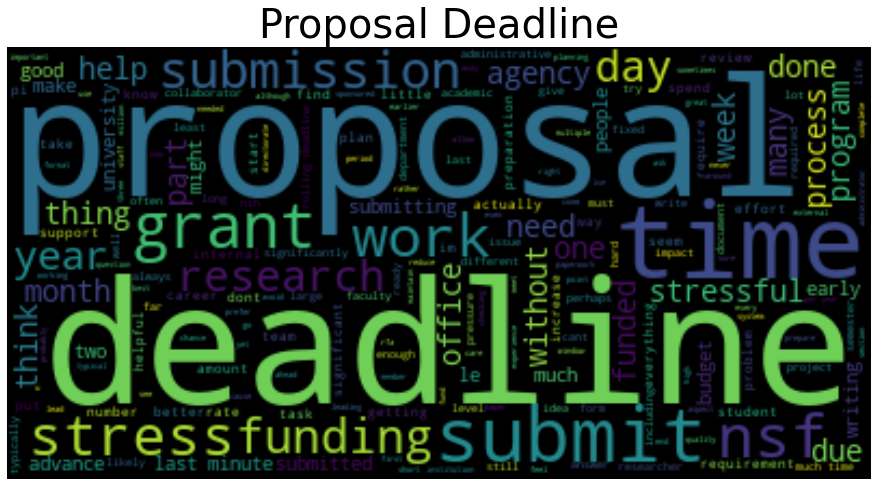

In [26]:
text = " ".join(review for review in Data['cleaned_text'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
fig = plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Proposal Deadline', fontdict = {'fontsize' : 40})
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [27]:
fig.savefig("Proposal.pdf", bbox_inches='tight')

## Conference paper

In [28]:
Conf_Data = pd.DataFrame({'comments' : df1['please_write_about_any']})
Conf_Data = Conf_Data[Conf_Data['comments'].notna()]
Conf_Data.head()

,comments
8,I gave up on preparing for deadlines and started preparing papers in an ongoing basis. I watch f...
11,I think these deadlines work well the way they are.
19,"I listed ""A"" for the CORE item because I attend the top conferences in my field. But that is po..."
20,Worst aspect is the conference software system used for submission. That is where most of my pro...
37,I learned early on that rushing to complete a research project in time to make a paper deadline ...


In [29]:
Conf_Data['cleaned_text'] = Conf_Data['comments'].apply(lambda x: clean_text(x))
Conf_Data.head()

,comments,cleaned_text
8,I gave up on preparing for deadlines and started preparing papers in an ongoing basis. I watch f...,gave preparing deadline started preparing paper ongoing basis watch deadline start feel paper re...
11,I think these deadlines work well the way they are.,think deadline work well way
19,"I listed ""A"" for the CORE item because I attend the top conferences in my field. But that is po...",listed core item attend top conference field potentially error social science population demogra...
20,Worst aspect is the conference software system used for submission. That is where most of my pro...,worst aspect conference software system used submission problem occur
37,I learned early on that rushing to complete a research project in time to make a paper deadline ...,learned early rushing complete research project time make paper deadline lead poor outcome never...


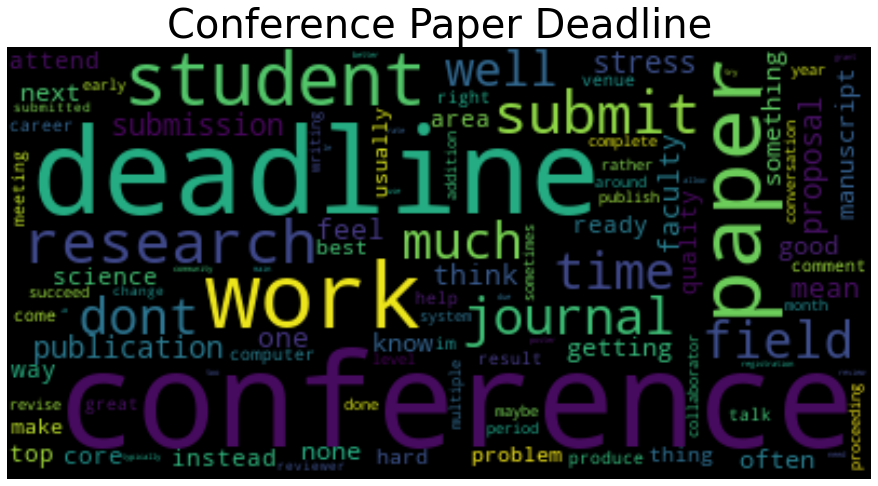

In [30]:
text = " ".join(review for review in Conf_Data['cleaned_text'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
fig = plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Conference Paper Deadline', fontdict = {'fontsize' : 40})
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

fig.savefig("ConferencePaper.pdf", bbox_inches='tight')